In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data = train_data.drop('Cabin',axis=1)

In [128]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
most_feq = train_data['Embarked'].mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(most_feq)

In [21]:
ave_age = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(ave_age)

In [35]:
test_data = test_data.drop('Cabin',axis=1)

In [39]:
ave_fare = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(ave_fare)
ave_mean = test_data['Age'].mean()
test_data['Age']=test_data['Age'].fillna(ave_mean)

In [45]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Survival Count'}, xlabel='Survived', ylabel='count'>

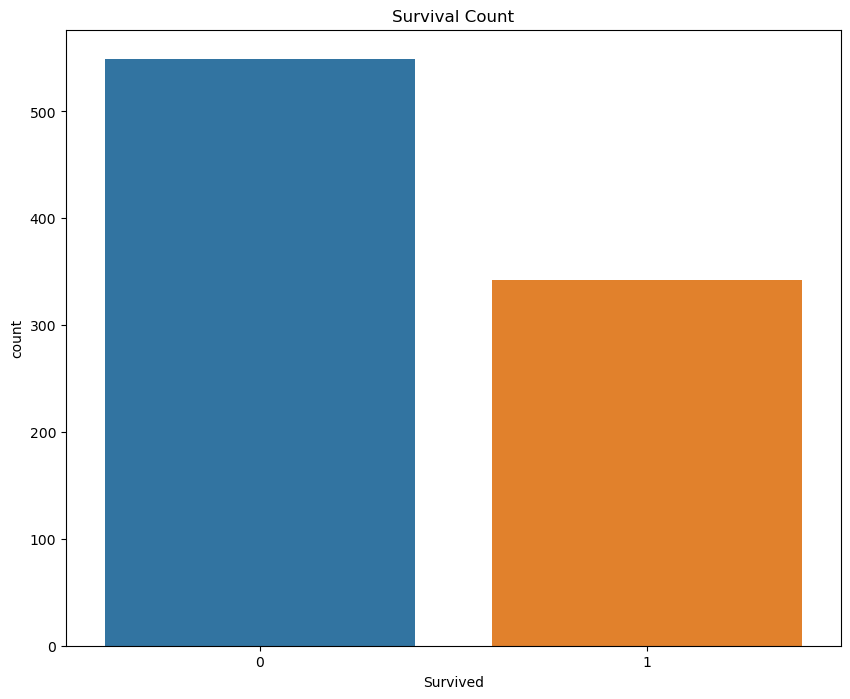

In [56]:
plt.figure(figsize=(10,8))
plt.title('Survival Count')
sns.countplot(data=train_data,x='Survived',order=train_data['Survived'].value_counts().index)

<Axes: title={'center': 'Passangers Distribution in Each Class'}, xlabel='Pclass', ylabel='count'>

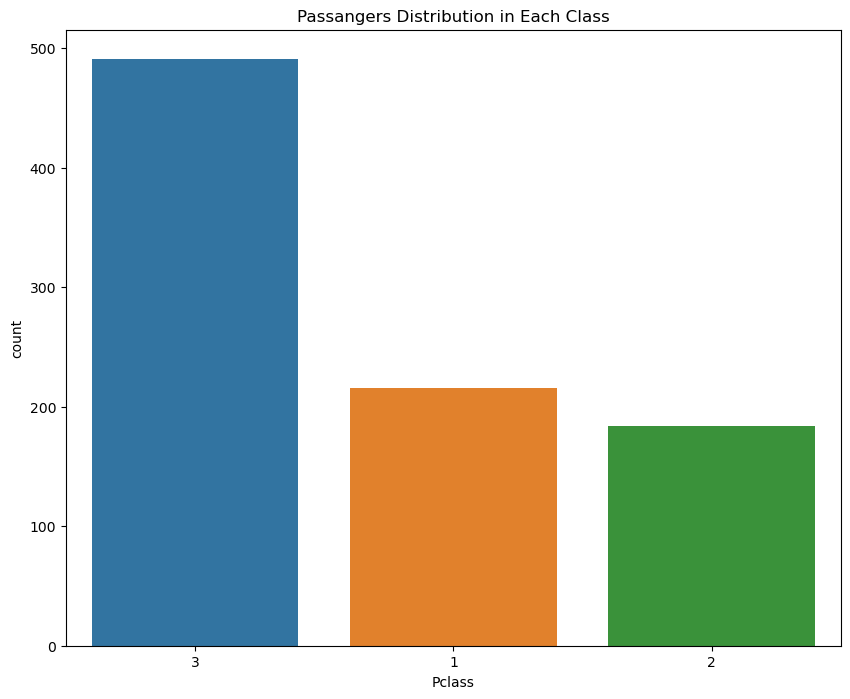

In [58]:
plt.figure(figsize=(10,8))
plt.title('Passangers Distribution in Each Class')
sns.countplot(data=train_data,x='Pclass',order=train_data['Pclass'].value_counts().index)

<Axes: title={'center': 'Sex Count'}, xlabel='Sex', ylabel='count'>

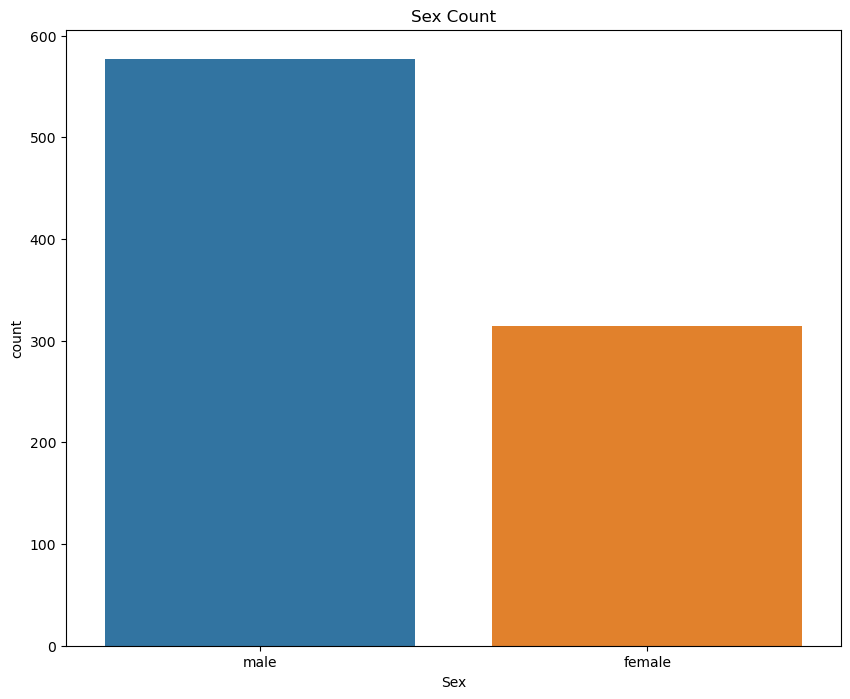

In [60]:
plt.figure(figsize=(10,8))
plt.title('Sex Count')
sns.countplot(data=train_data,x='Sex',order=train_data['Sex'].value_counts().index)

C:\Users\Oluoch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age Distribution')

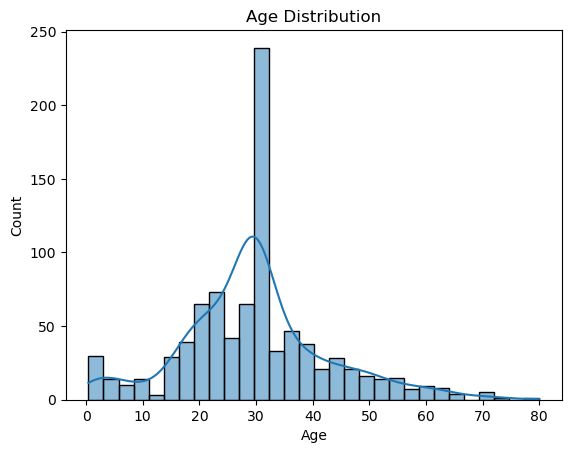

In [64]:
sns.histplot(train_data['Age'],kde=True)
plt.title('Age Distribution')

C:\Users\Oluoch\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Fare Distribution')

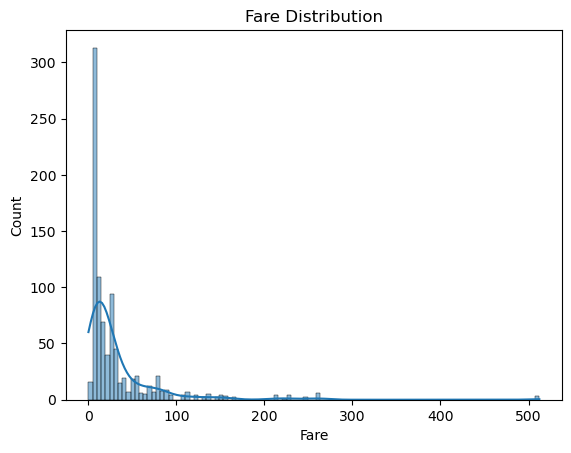

In [67]:
sns.histplot(train_data['Fare'],kde=True)
plt.title('Fare Distribution')

<Axes: title={'center': 'Distribution of Embarked'}, xlabel='Embarked', ylabel='count'>

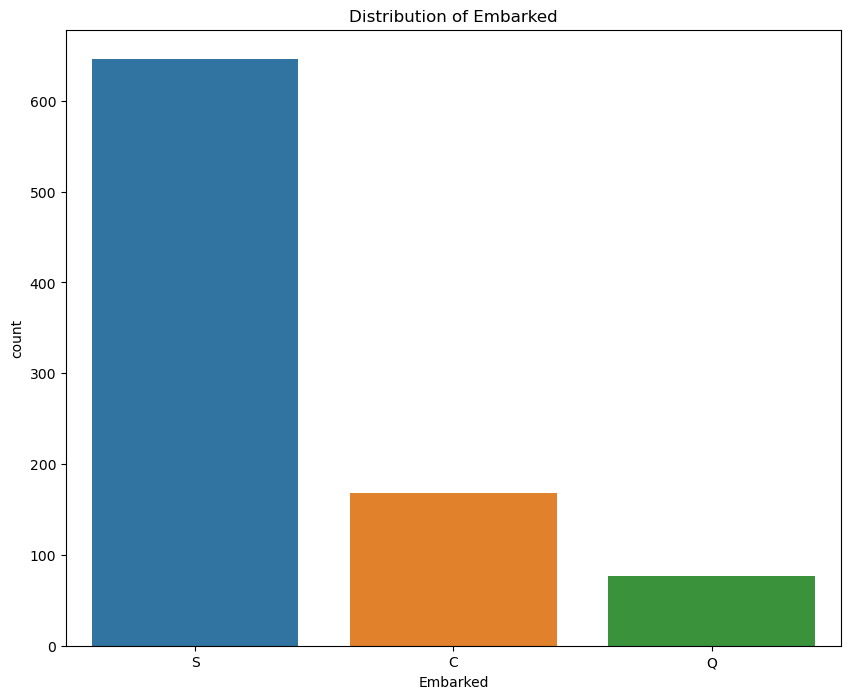

In [71]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Embarked')
sns.countplot(data=train_data,x='Embarked',order=train_data['Embarked'].value_counts().index)

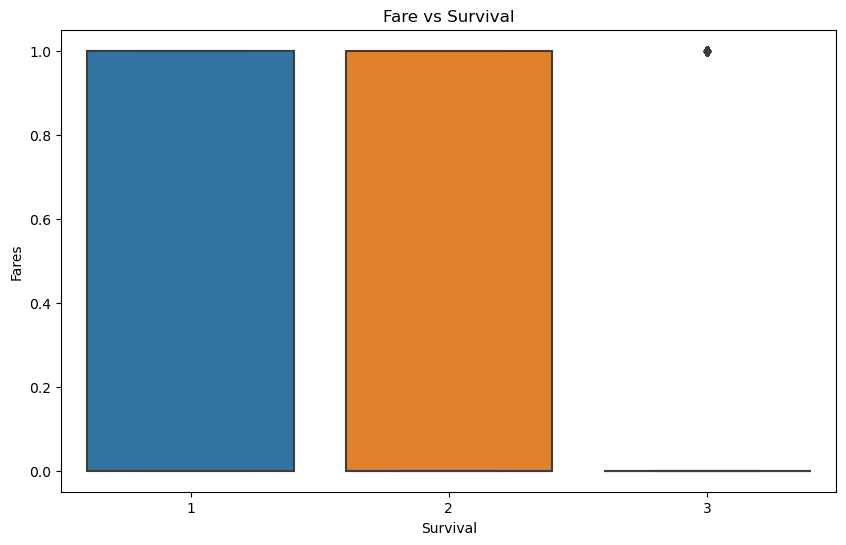

In [130]:
#Fare vs survival
plt.figure(figsize=(10,6))
plt.title('Fare vs Survival')
sns.boxplot(x='Pclass',y='Survived',data=train_data)
plt.xlabel('Survival')
plt.ylabel('Fares')
plt.show()

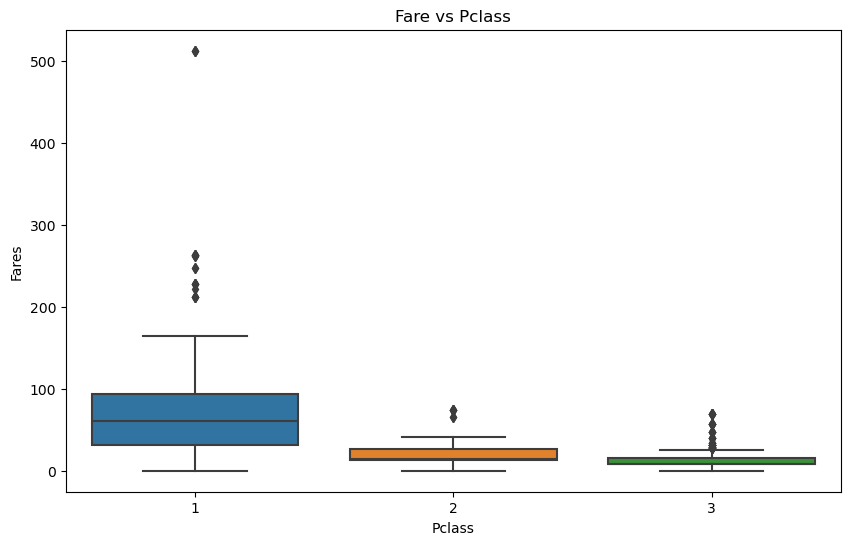

In [79]:
plt.figure(figsize=(10,6))
plt.title('Fare vs ')
sns.boxplot(x='Pclass',y='Fare',data=train_data)
plt.xlabel('Pclass')
plt.ylabel('Fares')
plt.show()

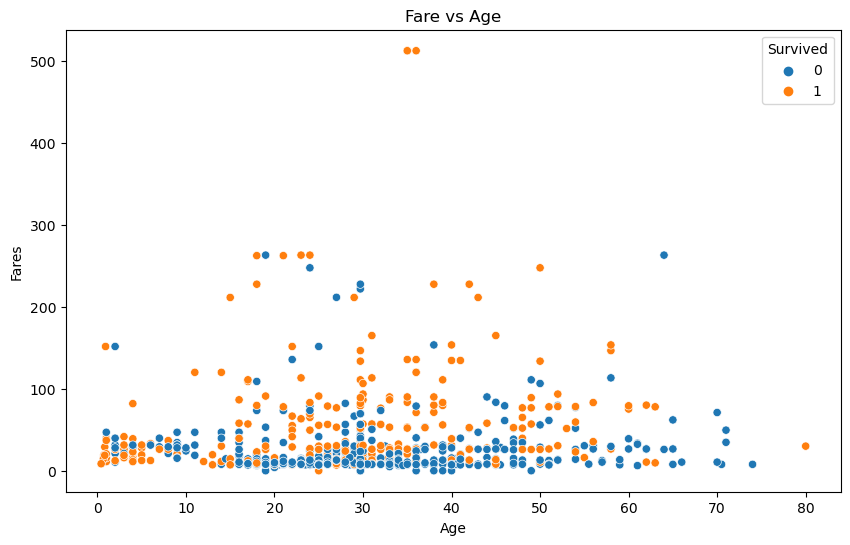

In [132]:
plt.figure(figsize=(10,6))
plt.title('Fare vs Age')
sns.scatterplot(x='Age',y='Fare',data=train_data,hue='Survived')
plt.xlabel('Age')
plt.ylabel('Fares')
plt.show()

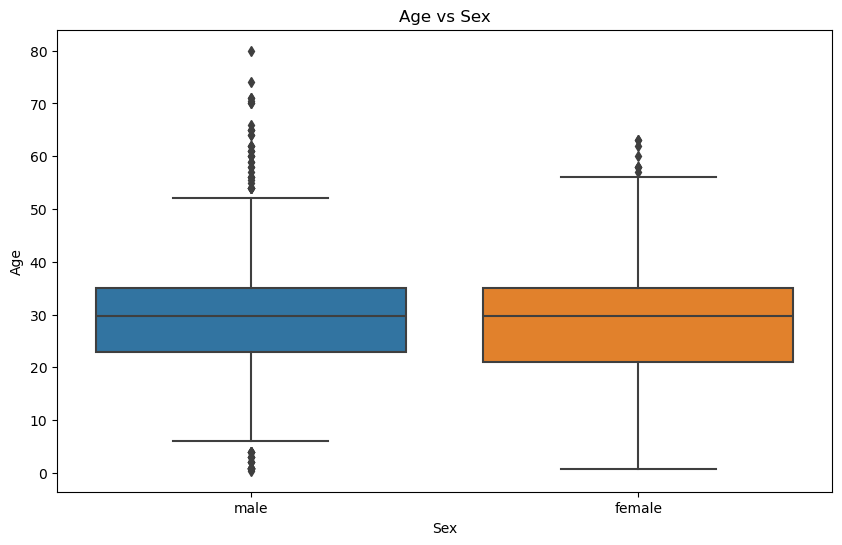

In [85]:
plt.figure(figsize=(10,6))
plt.title('Age vs Sex')
sns.boxplot(x='Sex',y='Age',data=train_data)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

In [115]:
from sklearn.ensemble import RandomForestClassifier

y=train_data['Survived']
features=['Pclass','Sex','Fare','Age','SibSp','Parch','Embarked']
X=pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])



model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X,y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('sub.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validated Accuracy: {cv_scores.mean() * 100:.2f}%")

Cross-Validated Accuracy: 82.27%
